<a href="https://colab.research.google.com/github/Vivekanand-Khatke/Playstore_data_analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing all the essential liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading the files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir_path="/content/drive/MyDrive/Colab Notebooks/Capstone projects/Playstore app/"
play_store_data=pd.read_csv(working_dir_path + 'Play Store Data.csv')

#Data Exploration

In [ ]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store_data.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Checking Null Values

In [ ]:
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#Handling Null Values

In [ ]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_data['Rating'].fillna(play_store_data['Rating'].mean(), \
                                 inplace = True)

In [ ]:
play_store_data['Reviews_numeric'] = play_store_data['Reviews'].apply(lambda x: x.replace('M',''))
play_store_data['Reviews_numeric'] = play_store_data['Reviews_numeric'].astype('float64').astype('int64')
reviews = [row[1]['Reviews_numeric'] * 1000000 if row[1]['Reviews'][-1] == 'M' \
           else row[1]['Reviews_numeric'] for row in play_store_data.iterrows()]
play_store_data['Reviews'] = np.array(reviews)
play_store_data.drop(columns=['Reviews_numeric'], inplace = True)

In [ ]:
play_store_data['Size'].replace('Varies with device', '0M', inplace = True)
play_store_data['Size_numeric'] = play_store_data['Size'].apply(lambda x:x[:-1])
play_store_data['Size_numeric'] = play_store_data['Size_numeric'].str.replace(',','')
play_store_data['Size_numeric'] = play_store_data['Size_numeric'].astype('float64')
size = [row[1]['Size_numeric'] * 1024 if row[1]['Size'][-1].lower() == 'm' \
        else row[1]['Size_numeric'] for row in play_store_data.iterrows()]
play_store_data['Size'] = np.array(size)
play_store_data.drop(columns=['Size_numeric'], inplace = True)
play_store_data['Size'].replace(0, play_store_data['Size'].mean(), inplace = True)

In [ ]:
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x:x.replace('+','').replace(',',''))
play_store_data['Installs'].replace('Free', '0', inplace = True)
play_store_data['Installs'] = play_store_data['Installs'].astype('int64')

In [ ]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
play_store_data.dropna(inplace = True)

In [ ]:
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: x.replace('$', ''))
play_store_data['Price'] = play_store_data['Price'].astype('float64')

In [ ]:
play_store_data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
from datetime import datetime

In [ ]:
play_store_data['Last Updated'] = play_store_data['Last Updated'].apply(lambda x : datetime.strptime(x,'%B %d, %Y'))

In [ ]:
play_store_data.reset_index(inplace = True)

In [ ]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           10829 non-null  int64         
 1   App             10829 non-null  object        
 2   Category        10829 non-null  object        
 3   Rating          10829 non-null  float64       
 4   Reviews         10829 non-null  int64         
 5   Size            10829 non-null  float64       
 6   Installs        10829 non-null  int64         
 7   Type            10829 non-null  object        
 8   Price           10829 non-null  float64       
 9   Content Rating  10829 non-null  object        
 10  Genres          10829 non-null  object        
 11  Last Updated    10829 non-null  datetime64[ns]
 12  Current Ver     10829 non-null  object        
 13  Android Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)


# Correlation

In [ ]:
play_store_data.corr()

,index,Rating,Reviews,Size,Installs,Price
index,1.000000,-0.120355,-0.115798,-0.096359,-0.133300,0.005433
Rating,-0.120355,1.000000,0.067945,0.070177,0.051126,-0.020193
Reviews,-0.115798,0.067945,1.000000,0.118855,0.643112,-0.009674
Size,-0.096359,0.070177,0.118855,1.000000,0.068556,-0.021652
Installs,-0.133300,0.051126,0.643112,0.068556,1.000000,-0.011698
Price,0.005433,-0.020193,-0.009674,-0.021652,-0.011698,1.000000


In [ ]:
play_store_data.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
play_store_data['Rating_int'] = play_store_data['Rating'].astype('int64')

In [ ]:
rating_range_data = play_store_data.groupby(by='Rating_int') \
                    .agg({'Installs':sum,'App':'size'}).reset_index()

In [ ]:
display(rating_range_data)

,Rating_int,Installs,App
0,1,1156475,56
1,2,26581700,231
2,3,9333759600,1710
3,4,158270268579,8558
4,5,90023,274


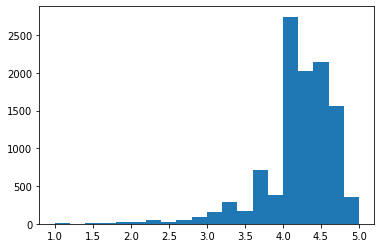

In [ ]:
plt.hist(play_store_data['Rating'], bins = 20)
plt.show()

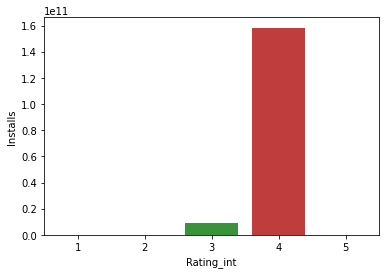

In [ ]:
sns.barplot(x = 'Rating_int', y = 'Installs', data = rating_range_data, ci = None)
plt.show()

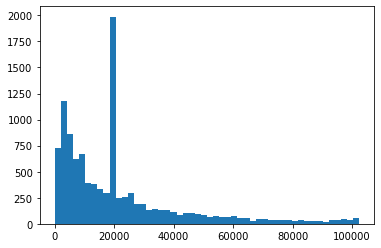

In [ ]:
plt.hist(play_store_data['Size'], bins = 50)
plt.show()

In [ ]:
play_store_data[play_store_data['Rating']>4]['Installs'].sum()

147609867192

In [ ]:
play_store_data.groupby(by='Category')['Installs'].sum().sort_values(ascending = False)

Category
GAME                   35086024415
COMMUNICATION          32647276251
PRODUCTIVITY           14176091369
SOCIAL                 14069867902
TOOLS                  11452271905
FAMILY                 10258203405
PHOTOGRAPHY            10088247655
NEWS_AND_MAGAZINES      7496317760
TRAVEL_AND_LOCAL        6868887146
VIDEO_PLAYERS           6222002720
SHOPPING                3247848785
ENTERTAINMENT           2869160000
PERSONALIZATION         2325483782
BOOKS_AND_REFERENCE     1921468576
SPORTS                  1751174498
HEALTH_AND_FITNESS      1583072512
BUSINESS                1001914865
FINANCE                  876648734
EDUCATION                871452000
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                537643539
WEATHER                  426100520
FOOD_AND_DRINK           273898751
DATING                   264310807
HOUSE_AND_HOME           168712461
ART_AND_DESIGN           124333100
LIBRARIES_AND_DEMO        61995910
COMICS                    56086150
MEDICAL    

In [ ]:
play_store_data.groupby('Category').size().sort_values(ascending = False)

Category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
COMICS                   60
PARENTING                60
BEAUTY                   53
dtype: int64

In [ ]:
play_store_data.sort_values(by=['Category','Installs'],ascending=[True, False], inplace = True)

In [ ]:
display(play_store_data.groupby(by='Category')['Category','App','Installs'].head(5)\
        .reset_index(drop = True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,App,Installs
0,ART_AND_DESIGN,Sketch - Draw & Paint,50000000
1,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
2,ART_AND_DESIGN,ibis Paint X,10000000
3,ART_AND_DESIGN,Textgram - write on photos,10000000
4,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
...,...,...,...
160,WEATHER,The Weather Channel: Rain Forecast & Storm Alerts,50000000
161,WEATHER,AccuWeather: Daily Forecast & Live Weather Rep...,50000000
162,WEATHER,"GO Weather - Widget, Theme, Wallpaper, Efficient",50000000
163,WEATHER,Weather & Clock Widget for Android,50000000


In [ ]:
play_store_data.groupby(by='Content Rating')['Installs'].sum().sort_values(ascending = False)

Content Rating
Everyone           114155082511
Teen                34716350393
Everyone 10+        13233881795
Mature 17+           5524491178
Adults only 18+         2000000
Unrated                   50500
Name: Installs, dtype: int64

In [ ]:
play_store_data.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_int
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4
12,12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20480.000000,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1 and up,4
18,19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31744.000000,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up,4
41,42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,18585.803976,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,4
44,45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24576.000000,10000000,Free,0.0,Everyone,Art & Design,2018-07-31,1.6.1,4.1 and up,4
